In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime
import os
import math

In [285]:
with open("db_raka.json", "r") as fh:
    db_raka = json.load(fh)
    
with open("db_stanley.json", "r") as fh:
    db_stanley = json.load(fh)

with open("db_yannik.json", "r") as fh:
    db_yannik = json.load(fh)
    
for stamp in db_yannik:
    if(stamp["timestamp"] == "2022-01-13T13:00:01+00:00"):
        print("yes")
        print(stamp)
    else:
        print(stamp["timestamp"])

2022-01-11T12:00:01+00:00
2022-01-11T12:15:01+00:00
2022-01-11T12:30:01+00:00
2022-01-11T12:45:01+00:00
2022-01-11T13:00:01+00:00
2022-01-11T13:15:01+00:00
2022-01-11T13:30:01+00:00
2022-01-11T13:45:01+00:00
2022-01-11T13:00:01+00:00
2022-01-11T13:15:01+00:00
2022-01-11T13:30:01+00:00
2022-01-11T13:45:01+00:00
2022-01-11T14:00:01+00:00
2022-01-11T14:15:01+00:00
2022-01-11T14:30:01+00:00
2022-01-11T14:45:01+00:00
2022-01-11T15:00:01+00:00
2022-01-11T15:15:01+00:00
2022-01-11T15:30:01+00:00
2022-01-11T15:45:01+00:00
2022-01-11T16:00:01+00:00
2022-01-11T16:15:01+00:00
2022-01-11T16:30:01+00:00
2022-01-11T16:45:01+00:00
2022-01-11T17:00:01+00:00
2022-01-11T17:15:01+00:00
2022-01-11T17:30:01+00:00
2022-01-11T17:45:01+00:00
2022-01-11T18:00:01+00:00
2022-01-11T18:15:01+00:00
2022-01-11T18:30:01+00:00
2022-01-11T18:45:01+00:00
2022-01-11T18:47:44+00:00
2022-01-11T19:00:01+00:00
2022-01-11T19:15:01+00:00
2022-01-11T19:30:01+00:00
2022-01-11T19:45:01+00:00
2022-01-11T20:00:01+00:00
2022-01-11T2

In [316]:
idle_raka = {}
idle_raka["2022-01-13T01:45:00+00:00"] = "2022-01-13T07:45:00+00:00"
idle_raka["2022-01-14T01:00:00+01:00"] = "2022-01-14T08:00:00+01:00"

idle_stanley = {}
idle_stanley["2022-01-09T23:00:00+01:00"] = "2022-01-10T08:15:00+01:00"
idle_stanley["2022-01-10T22:30:00+01:00"] = "2022-01-11T08:15:00+01:00"
idle_stanley["2022-01-12T23:00:00+00:00"] = "2022-01-13T08:00:00+00:00"
idle_stanley["2022-01-13T23:00:00+01:00"] = "2022-01-14T07:45:00+01:00" #Laptop-Peak at 1am due to McAffee update, handy-peak at 3:30am due to McAfee update

idle_yannik = {}
idle_yannik["2022-01-13T00:30:00+01:00"] = "2022-01-13T05:30:00+01:00"
idle_yannik["2022-01-13T06:30:00+01:00"] = "2022-01-13T19:00:00+01:00" #Tablet-Peak at 1pm due to iCloud Photo Sync
idle_yannik["2022-01-14T08:45:00+01:00"] = "2022-01-14T17:00:00+01:00"
idle_yannik["2022-01-15T01:00:00+01:00"] = "2022-01-15T09:30:00+01:00"
idle_yannik["2022-01-16T01:30:00+01:00"] = "2022-01-16T09:30:00+01:00"
idle_yannik["2022-01-16T23:30:00+01:00"] = "2022-01-17T08:30:00+01:00"#
idle_yannik["2022-01-18T01:15:00+01:00"] = "2022-01-18T10:15:00+01:00" #Tablet-Peak at 4.45am due to Apple Image Updates

In [317]:
## Filtering data to receive idle times

In [324]:
def gen_activitygraph(startdate_str, enddate_str, startshade_str, endshade_str, shadecolor, db_used):
    ## Filtering Within a timerange
    startdate = datetime.datetime.fromisoformat(startdate_str)
    enddate = datetime.datetime.fromisoformat(enddate_str)

    startshade = datetime.datetime.fromisoformat(startshade_str)
    endshade = datetime.datetime.fromisoformat(endshade_str)

    def filter_func(stamp):
        date = datetime.datetime.fromisoformat(stamp["timestamp"])
        if startdate < date and date < enddate:
            return True
        else:
            return False

    db_filtered = [s for s in db_used if filter_func(s)]

    # Sorting dates
    def keyFunc(d):
        return datetime.datetime.fromisoformat(d["timestamp"])

    db_filtered.sort(key=keyFunc)

    ## Define plot data
    # Time Series
    dates = [datetime.datetime.fromisoformat(d["timestamp"]) for d in db_filtered]

    # Total data size
    sizes = []
    for stamp in db_filtered:
        size = 0
        for dev in stamp["devices"]:
            size += stamp["devices"][dev]["total_size"]
        sizes.append(size)
        ## Plot data
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1]) # main axes

    #plt.axvspan(startshade, endshade, color=shadecolor, alpha=0.2, lw=0)

    ax.plot(dates, sizes, label='Total traffic size', linewidth=3)
    
    #add all devices
    devices = set([])
    for stamp in db_filtered:
        for dev in stamp["devices"]:
            devices.add(dev)
    
    dev_sizes = {}
    for dev in devices:
        dev_sizes[dev] = []
        for stamp in db_filtered:
            if(dev in stamp["devices"]):
                dev_sizes[dev].append(stamp["devices"][dev]["total_size"])
            else:
                dev_sizes[dev].append(0.0)
        ax.plot(dates, dev_sizes[dev], label=dev, linewidth=3)

    #add title and axis labels
    ax.set_xlabel("Date")
    ax.set_ylabel("Traffic in bytes")
    #ax.set_yscale("log")
    ax.set_title("Measured traffic per device")
    ax.set_xticks(dates[::12])
    labels = [d.time().strftime("%H:%M") for d in dates]
    ax.set_xticklabels(labels[::12])

    #add legend
    ax.legend()
    
    fig.set_figwidth(4)
    fig.set_figheight(4)

    #display plot
    plt.show()

Raka: 2022-01-13T01:45:00+00:00


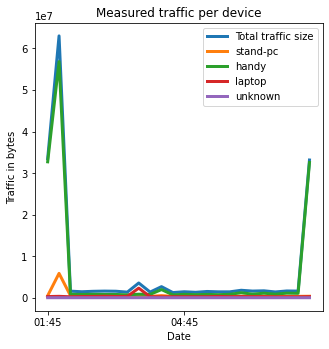

Raka: 2022-01-14T01:00:00+01:00


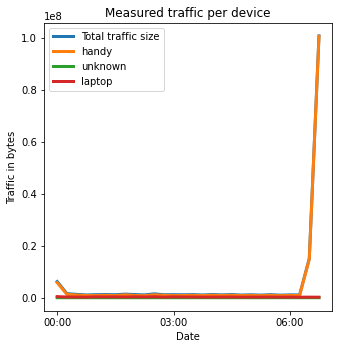

Stanley: 2022-01-09T23:00:00+01:00


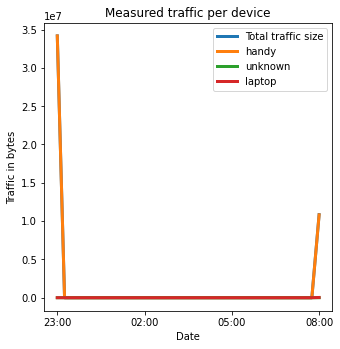

Stanley: 2022-01-10T22:30:00+01:00


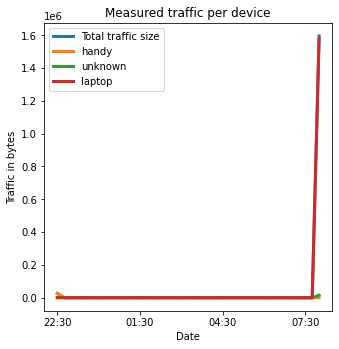

Stanley: 2022-01-12T23:00:00+00:00


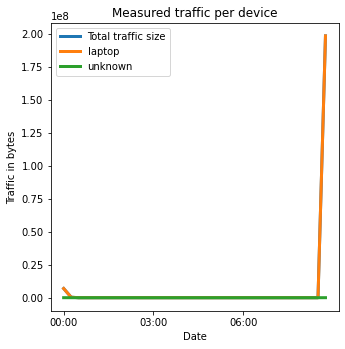

Stanley: 2022-01-13T23:00:00+01:00


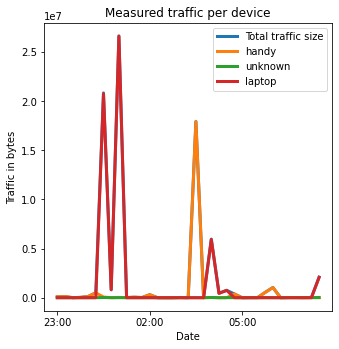

Yannik: 2022-01-13T00:30:00+01:00


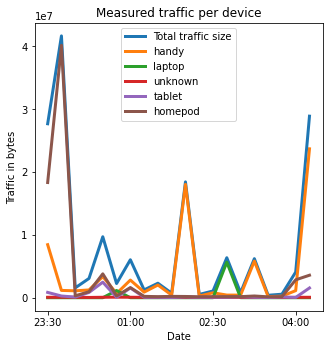

Yannik: 2022-01-13T06:30:00+01:00


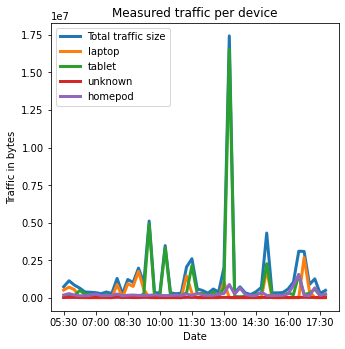

Yannik: 2022-01-14T08:45:00+01:00


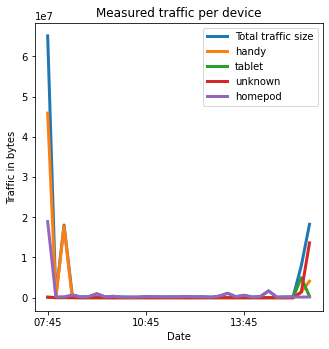

Yannik: 2022-01-15T01:00:00+01:00


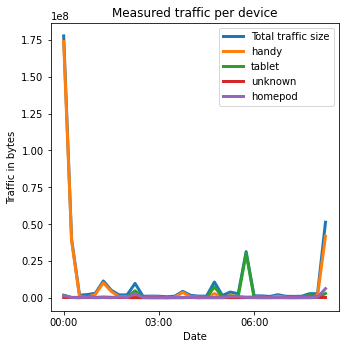

Yannik: 2022-01-16T01:30:00+01:00


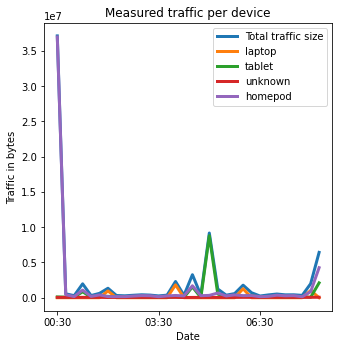

Yannik: 2022-01-16T23:30:00+01:00


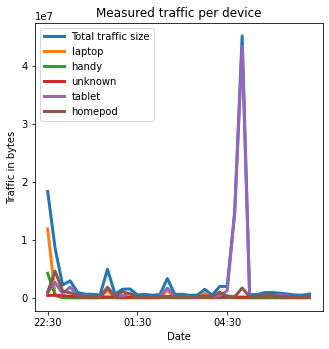

Yannik: 2022-01-18T01:15:00+01:00


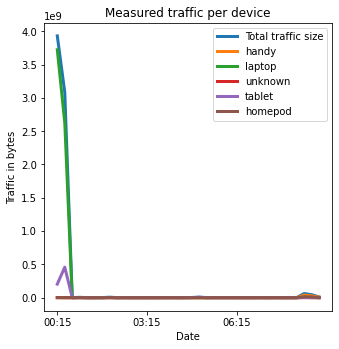

In [325]:
## Showing idle graphs
# Plot Rakas Graphs
for k in idle_raka.keys():
    print("Raka: " + k)
    gen_activitygraph(k, idle_raka[k], k, idle_raka[k], "yellow", db_raka)
    
# Plot Stanleys Graphs
for k in idle_stanley.keys():
    print("Stanley: " + k)
    gen_activitygraph(k, idle_stanley[k], k, idle_stanley[k], "yellow", db_stanley)
    
# Plot Yanniks Graphs
for k in idle_yannik.keys():
    print("Yannik: " + k)
    gen_activitygraph(k, idle_yannik[k], k, idle_yannik[k], "yellow", db_yannik)
    

